**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# import data 2C_weka.csv for 2 Class Classifcation.


In [40]:
data_2C = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

### Answer

In [41]:
data_2C.shape

(310, 7)

- There are 310 rows and 7 columns in the dataset 

In [42]:
data_2C.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [43]:
data_2C.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [44]:
data_2C.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
164,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,Abnormal
50,55.285852,20.440118,34.000000,34.845733,115.877017,3.558372,Abnormal
53,30.149936,11.917445,34.000000,18.232491,112.684141,11.463223,Abnormal
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,Normal
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,Abnormal


- There is only one categorical variable - 'class'
- Categorical variable 'class' has 2 levels - Normal and Abnormal
- Remaining features are all numerical

### Checking dataframe for missing values

In [45]:
data_2C.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

There are no missing values in the Dataset.

### Checking for 5 point summary of the numerical data to get an idea of nature of the data (numerical and graphical analysis)

In [46]:
data_2C.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### Checking data types of the features

In [47]:
data_2C.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

- All the data types are float except class which is a categorical type of variable

### Checking for the different unique values of categorical variable 'class'

In [48]:
data_2C['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

- There are two categories of data - Abnormal and Normal 

### Distribution of values of class and attributes

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


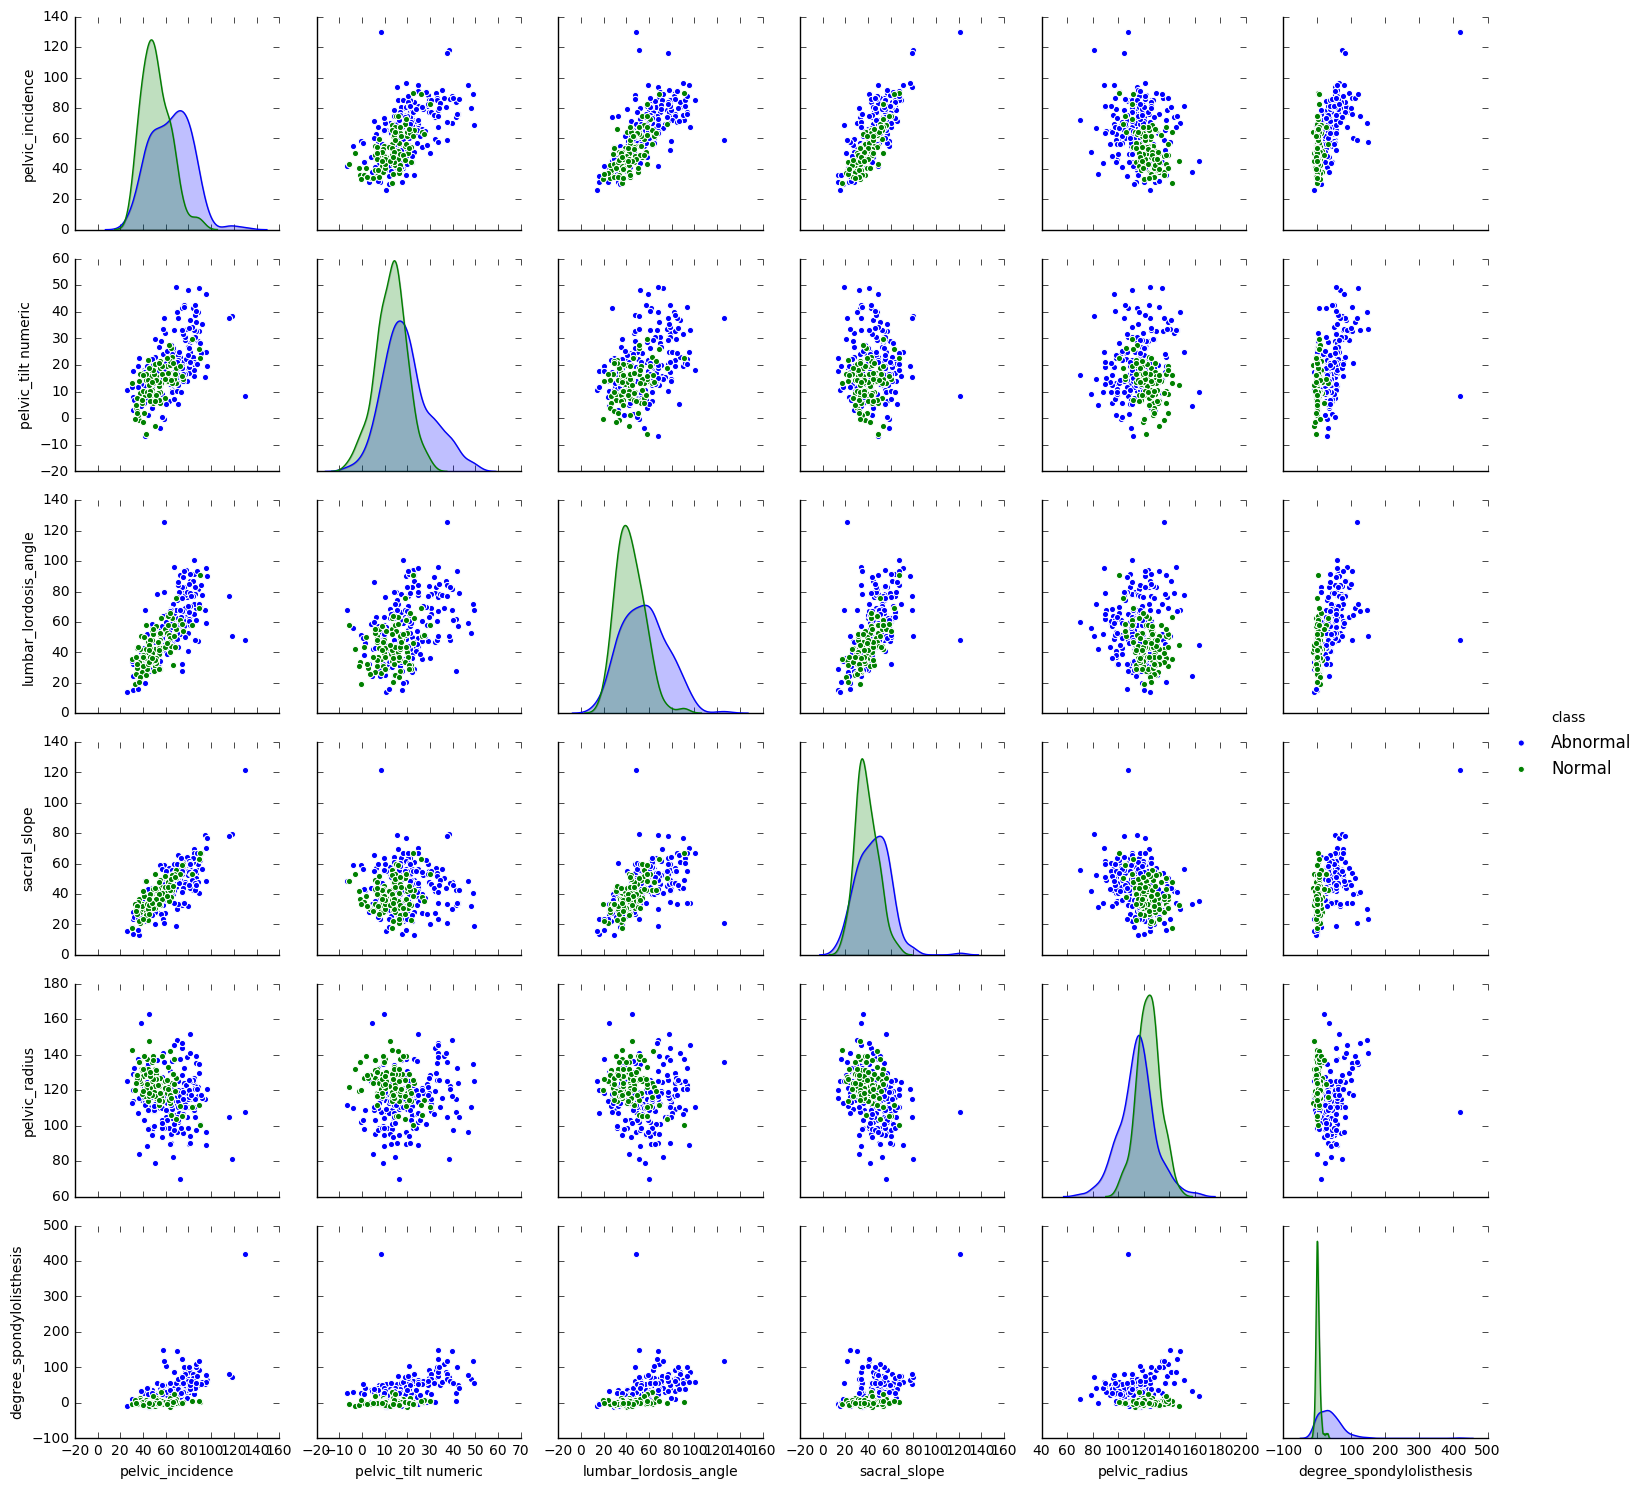

In [49]:
sns.pairplot(data_2C, hue='class');
plt.show()

- Pelvic Incidence seems to be positively correlated with pelvic_tilt_numeric, lumbar_lordosis_angle and sacral slope
- Degree_spondylolisthesis seem to correlate well with any of the ther features
- No strong correlation was found between pelvic_radius and pelivic incidence
- Distribution of degree_spoldylolisthesis is heavily right skewed with very high peak for normal class.
- pelvic_tilt_numeric does not seem to have correlation with pelvic radius and sacral slope. But seems to have slight correlation with lumbar_lordosis_angle
- pelvic_tilt_numeric is slightly right skewed 
- There seems to be postive correlation between sacral_slope and lumbar_lordosis_angle.
- pelvic_radius does not have correlation with other remaing features.

### Plotting the distribution of different classes for pelvic_radius and sacral_slope for visualization.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


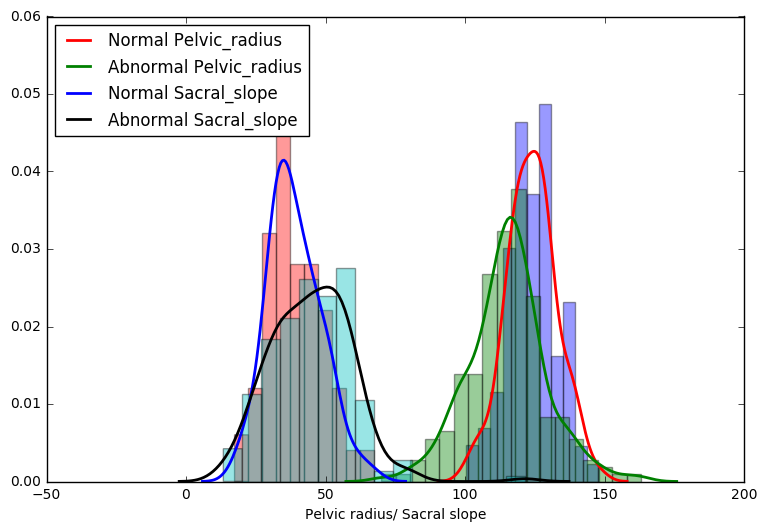

In [50]:
normal_dataset = data_2C.loc[data_2C['class'] == 'Normal']
abnormal_dataset = data_2C.loc[data_2C['class']== 'Abnormal']
dims = (9, 6)
fig, ax = plt.subplots(figsize=dims)
ax.set(xlabel = 'Pelvic radius/ Sacral slope')
sns.distplot(normal_dataset.pelvic_radius, kde_kws={"color":"r", "lw": 2, "label": "Normal Pelvic_radius"});
sns.distplot(abnormal_dataset.pelvic_radius, kde_kws={"color":"g", "lw": 2, "label": "Abnormal Pelvic_radius"});
sns.distplot(normal_dataset.sacral_slope, kde_kws={"color":"b", "lw": 2, "label": "Normal Sacral_slope"});
sns.distplot(abnormal_dataset.sacral_slope, kde_kws={"color":"k", "lw": 2, "label": "Abnormal Sacral_slope"});
ax.set(xlabel = 'Pelvic radius/ Sacral slope')
plt.show()

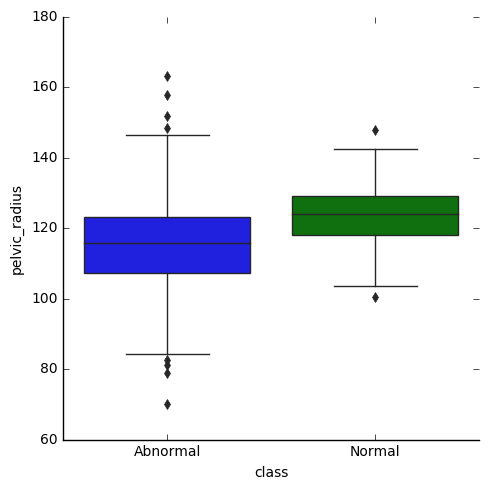

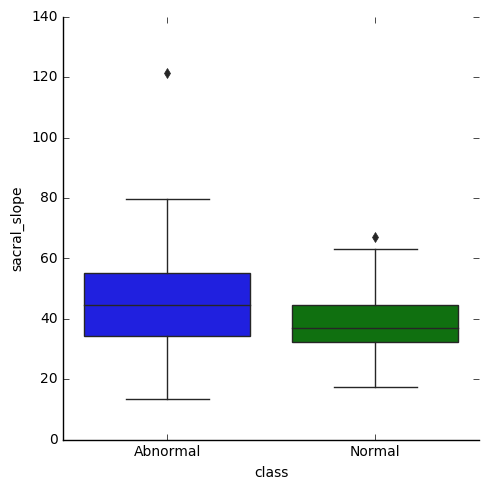

In [51]:
sns.catplot(x = 'class', y = 'pelvic_radius',  data=data_2C, kind = 'box')
sns.catplot(x = 'class', y = 'sacral_slope',  data=data_2C, kind = 'box')
plt.show()

- Pelvic radius and sacral slope have different values and the distributions are separate
- Pelvic radius in abnormal class has more outliers than sacral slope
- Normal and Abnormal class do not seem to effect pelvic radius and sacral slope 
- Abnormal frequency is lower than normal frequency

# Encode the Class variable to integer.

In [52]:
label_encoder = preprocessing.LabelEncoder() 
  

data_2C['class']= label_encoder.fit_transform(data_2C['class']) 

In [53]:
data_2C.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


#### Checking the codes that have been assigned to the categories

In [54]:
d = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print (d)

{'Normal': 1, 'Abnormal': 0}


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [55]:
X = data_2C.drop('class', axis = 1)

In [56]:
y = data_2C['class']

In [57]:
X.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Split the dat as train and test with a ratio of 70:30.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Verifying that the split has taken place correctly

In [60]:
X_train.shape

(217, 6)

In [61]:
X_test.shape

(93, 6)

- Dataset has been spilt into train and test datasets in the ratio of 70:30 

- Here only 1 random value is tested for developing the model. Model perfomance may change when the random state is changed.
- So, ideally we should run for several random states (as used in finding optimum value of K), and use the average value of testing and training accuracies to judge the model
- Here, only 1 random state value is used as the it is mentioned in the question to spilt and test the model with K = 3. . 

# Normalize your Data (X) to get values between 0 to 1.

In [62]:
mm_scaler = preprocessing.MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [64]:
y_predict_test=knn.predict(X_test_scaled)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [65]:
knn.score(X_test_scaled,y_test)

0.77419354838709675

In [66]:
accuracy_score(y_predict_test,y_test)

0.77419354838709675

In [67]:
y_predict_train = knn.predict(X_scaled)
accuracy_score(y_predict_train,y_train)

0.89400921658986177

### Accuracies for K = 3 and random state = 42
- Training accuracy = 0.8940
- Testing accuracy = 0.7741

#### When averged over different random states, with k =3, the average testing and training accuracies are found below:

In [68]:
train = []
test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
    mm=preprocessing.MinMaxScaler()
    scaledX_train = mm.fit_transform(X_train)
    scaledX_test = mm.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    
# Accuracy on the training dataset
train_accuracy_plot = np.mean(train)
# Accuracy on the testing dataset
test_accuracy_plot = np.mean(test)
# Differences between test and training set accuracies
difference_plot= train_accuracy_plot - test_accuracy_plot

print("Average Training Accuracy over 50 random states for K = 3: ", train_accuracy_plot)
print("Average Testing Accuracy over 50 random states for K = 3: ", test_accuracy_plot)



Average Training Accuracy over 50 random states for K = 3:  0.898617511521
Average Testing Accuracy over 50 random states for K = 3:  0.795698924731


### Accuracies for K = 3 and averaged over 100 random state values
- Training accuracy = 0.90
- Testing accuracy = 0.782

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

#### Algorithm used:
- A good model should not depend on the number of the random state selected for spliting the data
- Hence there are two parameters which have to be optimised - random state and k
- The value of K has to be chosen in such a way that over the variation of random states the training accuracy and the difference between training and testing accuracies should be minimum
- It should not be that changing the data spliting radon state needs a change in the model 
- Hence, here, a nested loop is run over random state and K, so that we get the optimum value of K
- Criteria for choosing best K:
    - Lowest difference between training and testing accuracies 
    - Highest training accuracy

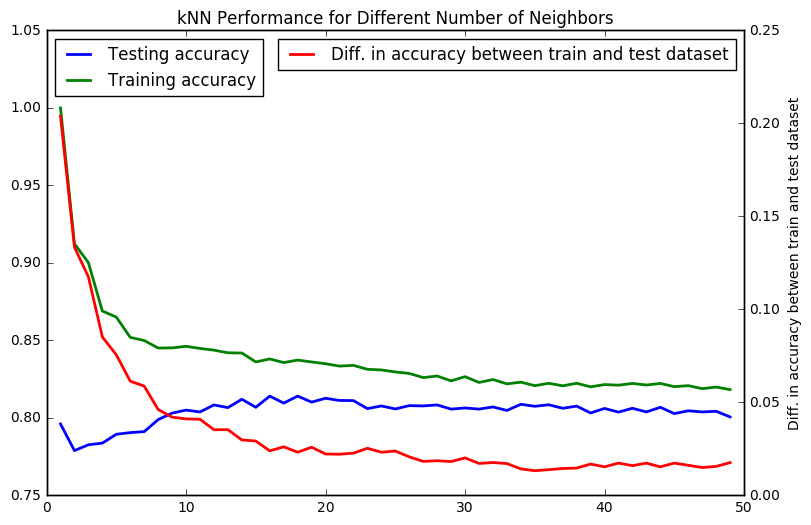

Optimum results with highest test accuracy and lowest diff between test and train accuracy 

Optimum K:  16
Training Accuracy for optimum K:  0.838064516129
Testing Accuracy for optimum K:  0.814086021505


In [69]:
neighbors = np.arange(1, 50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
difference_plot = np.empty(len(neighbors))
diff_low = 100.0
test_high = 0.0
train_high = 0.0
nodes = 0
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        mm=preprocessing.MinMaxScaler()
        scaledX_train = mm.fit_transform(X_train)
        scaledX_test = mm.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    # Accuracy on the training dataset
    train_accuracy_plot[i] = np.mean(train)
    # Accuracy on the testing dataset
    test_accuracy_plot[i] = np.mean(test)
    # Differences between test and training set accuracies
    difference_plot[i]= train_accuracy_plot[i] - test_accuracy_plot[i]
    if (diff_low > difference_plot[i]) & (test_high < test_accuracy_plot[i]):
        diff_low = difference_plot[i]
        test_high = test_accuracy_plot[i]
        train_high = train_accuracy_plot[i]
        nodes = i+1
        
# Generate plot
dims = (9, 6)
fig, ax = plt.subplots(figsize=dims)
ax2 = ax.twinx()
plt.title('kNN Performance for Different Number of Neighbors')
ax.plot(neighbors, test_accuracy_plot, lw = 2, label = 'Testing accuracy')
ax.plot(neighbors, train_accuracy_plot, lw = 2, label = 'Training accuracy')
ax2.plot(neighbors, difference_plot, color = 'red', lw = 2, label = 'Diff. in accuracy between train and test dataset')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
ax2.set_ylabel('Diff. in accuracy between train and test dataset')
plt.show()
print("Optimum results with highest test accuracy and lowest diff between test and train accuracy \n")
print("Optimum K: ", nodes)
print("Training Accuracy for optimum K: ", train_high)
print("Testing Accuracy for optimum K: ", test_high)


#### FINAL MODEL PERFORMANCE:
- Optimum results with highest test accuracy and lowest diff between test and train accuracy 

- Optimum K:  16
- Training Accuracy for optimum K:  0.838
- Testing Accuracy for optimum K:  0.814 

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

### Reading the csv file as a dataframe using pandas

In [70]:
data_3C = pd.read_csv('3Classdata.csv')

In [71]:
data_3C.shape

(310, 7)

- There are 310 rows and 7 columns in the dataset 

In [72]:
data_3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [73]:
data_3C.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [74]:
data_3C.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
34,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,Hernia
195,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,Spondylolisthesis
17,31.276012,3.144669,32.562996,28.131342,129.011418,3.623020,Hernia
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Spondylolisthesis
79,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401,Spondylolisthesis


- There is only one categorical variable - 'class'
- Categorical variable 'class' has 3 levels - Normal, Abnormal and Spondylolisthesis
- Remaining features are all numerical

### Checking the data frame for missing values

In [75]:
data_3C.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

There are no missing values in the Dataset.

### Checking for 5 point summary of the numerical data to get an idea of nature of the data (numerical and graphical analysis)

In [76]:
data_3C.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### Checking data types of the features

In [77]:
data_3C.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

- All the data types are float except class which is a categorical type of variable

### Checking for the different unique values of categorical variable 'class'

In [78]:
data_3C['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

- There are three levels in variable 'class' - Hernia, Spondylolisthesis and Norma,l 

### Distribution of values of class and attributes

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


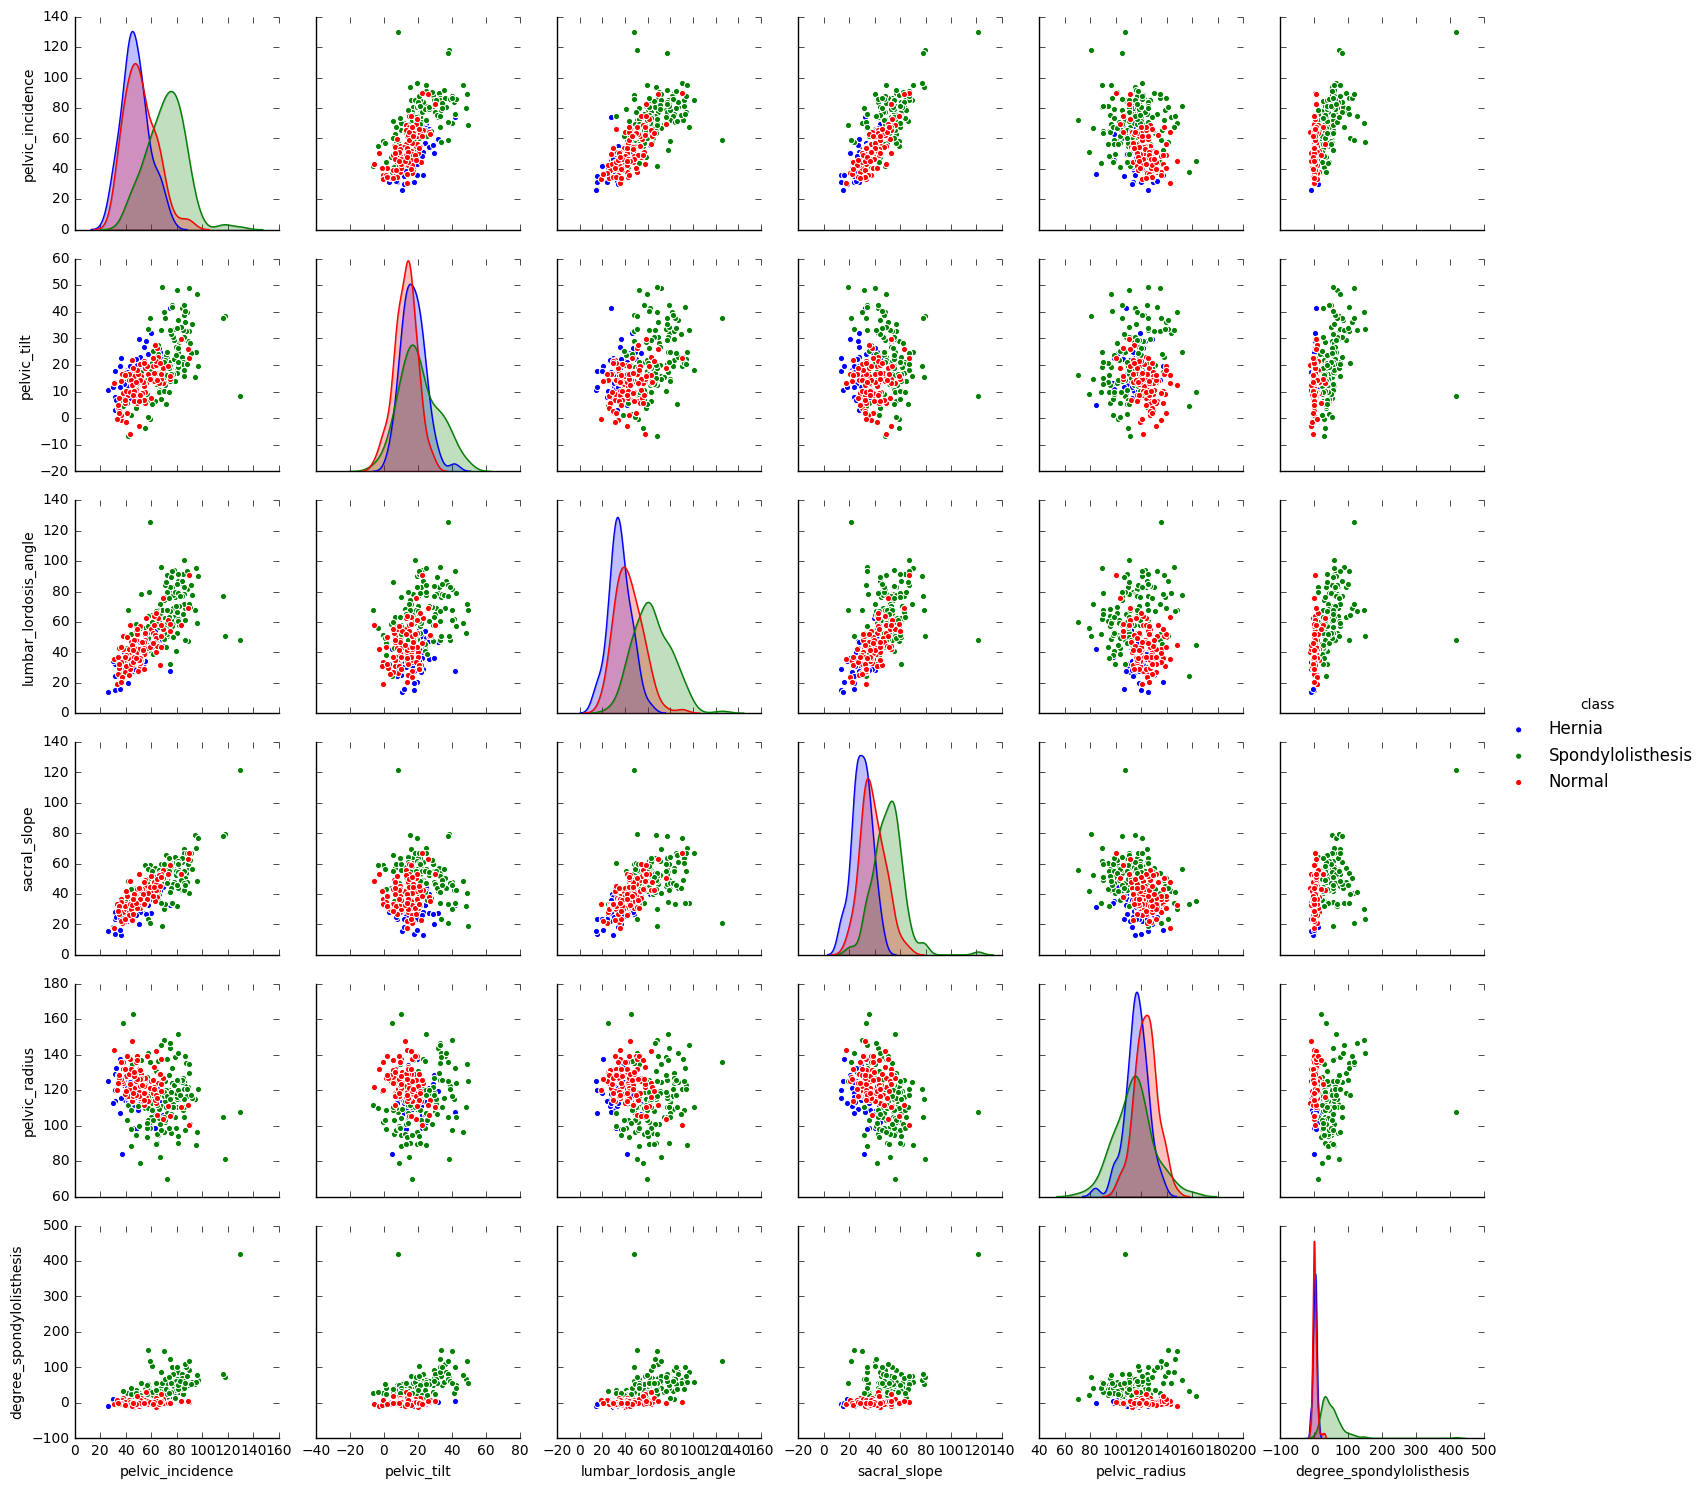

In [79]:
sns.pairplot(data_3C, hue = 'class');
plt.show()

- Pelvic Incidence seems to be positively correlated with pelvic_tilt_numeric, lumbar_lordosis_angle and sacral slope
- Degree_spondylolisthesis seem to correlate well with any of the ther features
- No strong correlation was found between pelvic_radius and pelivic incidence
- Distribution of degree_spoldylolisthesis is heavily right skewed with very high peak for normal and Hernia class.
- pelvic_tilt_numeric does not seem to have correlation with pelvic radius and sacral slope. But seems to have slight correlation with lumbar_lordosis_angle
- pelvic_tilt_numeric is slightly right skewed 
- There seems to be postive correlation between sacral_slope and lumbar_lordosis_angle.
- pelvic_radius does not have correlation with other remaing features.
- Frequency of spondylolisthesis is least.

### Plotting the distribution of different classes for pelvic_radius and sacral_slope for visualization.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


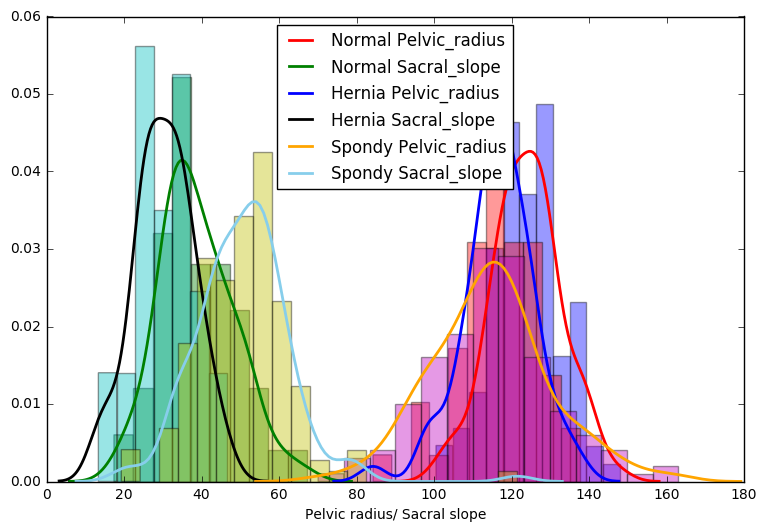

In [80]:
normal_dataset = data_3C.loc[data_3C['class'] == 'Normal']
hernia_dataset = data_3C.loc[data_3C['class']== 'Hernia']
spondy_dataset = data_3C.loc[data_3C['class'] == 'Spondylolisthesis']
dims = (9, 6)
fig, ax = plt.subplots(figsize=dims)
ax.set(xlabel = 'Pelvic radius/ Sacral slope')
sns.distplot(normal_dataset.pelvic_radius, kde_kws={"color":"r", "lw": 2, "label": "Normal Pelvic_radius"});
sns.distplot(normal_dataset.sacral_slope, kde_kws={"color":"g", "lw": 2, "label": "Normal Sacral_slope"});
sns.distplot(hernia_dataset.pelvic_radius, kde_kws={"color":"b", "lw": 2, "label": "Hernia Pelvic_radius"});
sns.distplot(hernia_dataset.sacral_slope, kde_kws={"color":"k", "lw": 2, "label": "Hernia Sacral_slope"});
sns.distplot(spondy_dataset.pelvic_radius, kde_kws={"color":"orange", "lw": 2, "label": "Spondy Pelvic_radius"});
sns.distplot(spondy_dataset.sacral_slope, kde_kws={"color":"skyblue", "lw": 2, "label": "Spondy Sacral_slope"});
ax.set(xlabel = 'Pelvic radius/ Sacral slope')
plt.show()

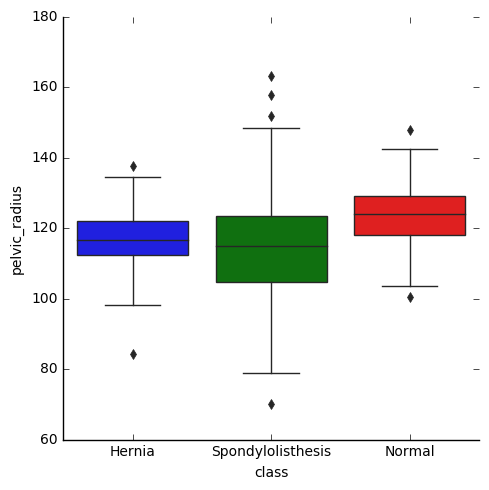

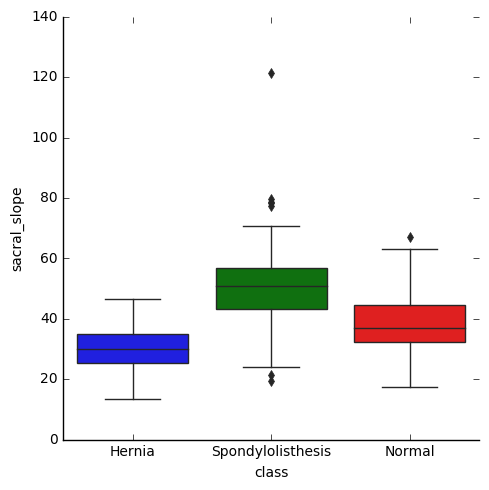

In [81]:
sns.catplot(x = 'class', y = 'pelvic_radius',  data=data_3C, kind = 'box');
sns.catplot(x = 'class', y = 'sacral_slope',  data=data_3C, kind = 'box');
plt.show()

- Pelvic radius and sacral slope have different values and the distributions are separate
- Normal, Hernia and Spondylolisthesis do not seem to effect pelvic radius
- For sacral_slope Spondylolisthesis shows slightly different distribution from the other two classes Hernia and Normal 
- Spondylolisthesis shows more outliers than Hernia and Normal
- Hernia frequency is the highest follwed by normal and then Spondylolisthesis

# Encode the Class variable to integer.
- Also  verified that the encoding has taken place correctly

In [82]:
label_encoder = preprocessing.LabelEncoder() 
data_3C['class']= label_encoder.fit_transform(data_3C['class']) 
data_3C.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


#### Checking the codes that have been assigned to the categories

In [83]:
d = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print (d)

{'Normal': 1, 'Spondylolisthesis': 2, 'Hernia': 0}


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [84]:
X3C = data_3C.drop('class', axis = 1)

In [85]:
y3C = data_3C['class']

In [86]:
X3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [87]:
y3C.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Split the dat as train and test with a ratio of 70:30.

In [88]:
X_train3C, X_test3C, y_train3C, y_test3C = train_test_split(X3C, y3C, test_size=0.3, random_state=42)

#### Verifying that the split has taken place correctly

In [89]:
X_train3C.shape

(217, 6)

In [90]:
X_test3C.shape

(93, 6)

- dataset has been spilt into test and train datasets in the ratio of 70:30 

- Here only 1 random value is tested for developing the model. Model perfomance may change when the random state is changed.
- So, ideally we should run for several random states (as used in finding optimum value of K), and use the average value of testing and training accuracies to judge the model
- Here, only 1 random state value is used as the it is mentioned in the question to spilt and test the model with K = 3. . 

# Normalize your Data (X) to get values between 0 to 1.

In [91]:
mm_scaler = preprocessing.MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X_train3C)
X_test_scaled = mm_scaler.transform(X_test3C)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y_train3C)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
y_predict3C=knn.predict(X_test_scaled)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [94]:
knn.score(X_test_scaled,y_test3C)

0.74193548387096775

In [95]:
accuracy_score(y_predict3C,y_test3C)

0.74193548387096775

In [96]:
y_predict_train = knn.predict(X_scaled)
accuracy_score(y_predict_train,y_train3C)

0.86635944700460832

### Accuracies for K = 3 and random state = 42
- Training accuracy = 0.866
- Testing accuracy = 0.741

#### When averged over different random states, with k =3, the average testing and training accuracies are found below:

In [97]:
train = []
test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X3C, y3C, test_size=0.30,random_state=i)
    mm=preprocessing.MinMaxScaler()
    scaledX_train = mm.fit_transform(X_train)
    scaledX_test = mm.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    
# Accuracy on the training set
train_accuracy_plot = np.mean(train)
# Accuracy on the testing set
test_accuracy_plot = np.mean(test)
# Differences between test and training set accuracies
difference_plot= train_accuracy_plot - test_accuracy_plot

print("Average Training Accuracy over 100 random states for K = 3: ", train_accuracy_plot)
print("Average Testing Accuracy over 100 random states for K = 3: ", test_accuracy_plot)



Average Training Accuracy over 100 random states for K = 3:  0.880414746544
Average Testing Accuracy over 100 random states for K = 3:  0.75064516129


### Accuracies for K = 3 and averaged over 50 random state values
- Training accuracy = 0.88
- Testing accuracy = 0.75

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

#### Algorithm used:
- A good model should not depend on the number of the random state selected for spliting the data
- Hence there are two parameters which have to be optimised - random state and k
- The value of K has to be chosen in such a way that over a variation of random states the training accuract and the difference between training and testing accuracies should be minimum
- It should not be that changing the data spliting radon state needs a change in the model 
- Hence, here, a nested loop is run over random state and K, so that we get the optimum value of K
- Criteria for choosing best K:
    - Lowest difference between training and testing accuracies 
    - Highest training accuracy

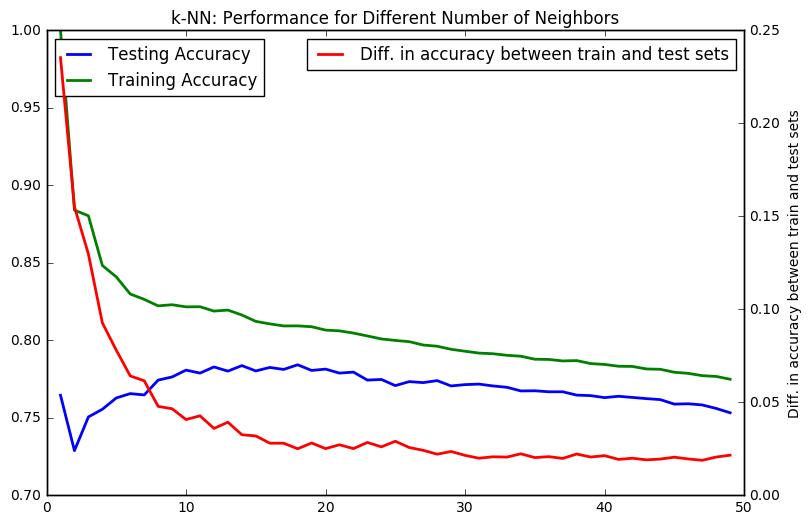

Optimum results with highest test accuracy and lowest diff between test and train accuracy 

Optimum K:  18
Training Accuracy for optimum K:  0.809400921659
Testing Accuracy for optimum K:  0.784301075269


In [98]:
neighbors = np.arange(1, 50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
difference_plot = np.empty(len(neighbors))
diff_low = 100.0
test_high = 0.0
train_high = 0.0
nodes = 0
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X3C, y3C, test_size=0.30,random_state=j)
        sc=preprocessing.MinMaxScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    #Compute differences between test and training set accuracies
    difference_plot[i]= train_accuracy_plot[i] - test_accuracy_plot[i]
    if (diff_low > difference_plot[i]) & (test_high < test_accuracy_plot[i]):
        diff_low = difference_plot[i]
        test_high = test_accuracy_plot[i]
        train_high = train_accuracy_plot[i]
        nodes = i+1
        
# Generate plot
dims = (9, 6)
fig, ax = plt.subplots(figsize=dims)
ax2 = ax.twinx()
plt.title('k-NN: Performance for Different Number of Neighbors')
ax.plot(neighbors, test_accuracy_plot, lw = 2, label = 'Testing Accuracy')
ax.plot(neighbors, train_accuracy_plot, lw = 2, label = 'Training Accuracy')
ax2.plot(neighbors, difference_plot, color = 'red', lw = 2, label = 'Diff. in accuracy between train and test sets')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
ax2.set_ylabel('Diff. in accuracy between train and test sets')
plt.show()
print("Optimum results with highest test accuracy and lowest diff between test and train accuracy \n")
print("Optimum K: ", nodes)
print("Training Accuracy for optimum K: ", train_high)
print("Testing Accuracy for optimum K: ", test_high)



#### Manually verifying the results

In [99]:
d = {'Trainng':train_accuracy_plot, 'testing':test_accuracy_plot, 'Diff.': difference_plot}
accuracy_data = pd.DataFrame(d)
accuracy_data

,Diff.,Trainng,testing
0,0.235376,1.000000,0.764624
1,0.155131,0.884055,0.728925
2,0.129770,0.880415,0.750645
3,0.092796,0.848387,0.755591
4,0.078065,0.840968,0.762903
5,0.064255,0.829954,0.765699
6,0.061659,0.826498,0.764839
7,0.047896,0.822304,0.774409
8,0.046590,0.823041,0.776452
9,0.040799,0.821659,0.780860


#### Result Verified

## FINAL MODEL PERFORMANCE:
- Optimum results with highest test accuracy and lowest diff between test and train accuracy 

- Optimum K:  18
- Training Accuracy for optimum K:  0.80
- Testing Accuracy for optimum K:  0.78

